Semana 3 - Actividad 1

Genaro Rodriguez Vazquez A01150931

Javier Rodríguez Rudas A01793817

Ciencia y analítica de Datos

Profesor: Dr. Jobish Vallikavungal Devassia  

3 Octubre 2022

Realiza una descripción y resume el entendimiento sobre conceptos de bases y almacenamiento de datos. Utiliza como mínimo 200 palabras indicadas como requisito.

1.	Fundamentos de bases de datos y para ciencia de datos. 


Es un conjunto de datos que se almacenan en un espacio físico tipo archivos planos o servidores dedicados al almacenamiento de datos, de manera centralizada y de uso compartidos. Cuyo objetivo es satisfacer las necesidades de información de una compañía, a través de un lenguaje de manipulación de datos (Structured Query Language) comúnmente llamado sentencias SQL.
Las bases de datos las podemos clasificar como: base de datos relacionales y base de datos NoSQL. La primera almacena la información en estructura de datos relacionadas entre sí, a través de un atributo en común entre ambas estructuras, compuestas por filas y columnas. La última (NoSQL), pero no menos importante, almacena los datos bajo el concepto de esquema clave-valor. 

2.	Fundamentos de almacenes de datos (Data Warehouse) para ciencia de datos.


Es un almacén de datos de gran tamaño. Proveniente de diferentes fuentes de datos, como archivos de textos csv, hojas de cálculo, JSON recuperados a través de un API, bases de datos relacionadas y xml en un base de datos NoSQL.
Los cuales se encuentran previamente transformados en una especie de esquema que nos permite hacer perspectivas, a través del análisis de datos y ciencias de datos.
Todo este proceso se logra en tres fases: ETL (Extracción, Transformación y Lectura o ELT (Extracción, Lectura y Transformaciones a demandas).


Parte 3: Preparación de los datos

Con base en los resultados de tu libreta de Google Colab de la Parte 2 responde detalladamente las siguientes preguntas: 

¿Qué datos considero mas importantes? ¿Por qué?
Todas las variables que tiene que ver con dinero, son importantes por default. A su vez, la edad y el nivel de estudios son críticos
por sentido común.

    X1: Amount of the given credit (NT dollar)
    X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
    X5: Age (year)
    #Really important to know how many months of delay are
    X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005)
    X12-X17: Amount of bill statement (NT dollar)
    X18-X23: Amount of previous payment (NT dollar)

#No considero que el sexo o el estado civil importe en este estudio

    X2: Gender (1 = male; 2 = female)
    X4: Marital status (1 = married; 2 = single; 3 = others)

¿Se eliminaron o reemplazaron datos nulos? ¿Qué se hizo y por qué?

    Se decidio eliminar por completo los renglones donde habia al menos 1 columna con datos nulos, ya que al utilizar la tecnica de eliminacion por lista, solamente se perdia el 1.4% de la data. Debido a que los datos que faltan no siempre estan en las mismas columnas, es dificil crear un algoritmo correcto que pueda justificar el valor que se reemplace por el nulo. Haciendo un balance de ello, consideramos que es mejor eliminar de tajo esos datos inconsistentes en vez de intentar rescatarlos y nos afecten en un futuro.

¿Es necesario ordenar los datos para el análisis? Sí / No / ¿Por qué?

    No consideramos que sea necesario ni practico ordenar los datos, haria sentido tal vez si existiera una columna con el valor de la fecha en la que dicho cliente se unio a la institucion, pero con el dataframe actual, no hace sentido ordenarlo bajo ninguna de las columnas existentes.

¿Existen problemas de formato que deban solucionar antes del proceso de modelado? Sí / No / Por qué.

    Existen valores negativos en las columnas X6-X11, puede ser que en algunos modelos esto nos pueda afectar y sea necesario asignar una letra en lugar de un valor continuo (-2 a 8 valores actuales). Por ahora hemos decidido no cambiar el formato de dichas columnas.

¿Qué ajustes se realizaron en el proceso de limpieza de datos (agregar, integrar, eliminar, modificar registros (filas), cambiar atributos (columnas)?

    Se renombraron todas las columnas para un mejor entendimiento del valor de cada columna, a su vez, se decidio eliminar todos los renglones donde la edad del cliente era mayor a 60 anos, pues de acuerdo al histograma por edades, se consideraban como outliers.

In [57]:
import pandas as pd
import numpy as np

In [58]:
#df contiene nuestro dataframe original
df = pd.read_csv('default of credit card clients.csv', index_col=0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Verificar si existen datos vacios:

In [59]:
df.isnull().values.any()

True

In [60]:
#Ejemplo de como se ven estos renglones con datos nulos en el dataframe (ID 19, columnas X12,....X17)
df.loc[18:22 , 'X10':'X19']

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
ID,,,,,,,,,,
18,-1.0,-1.0,253286.0,246536.0,194663.0,70074.0,5856.0,195599.0,10358.0,10000.0
19,-2.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
20,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,-1.0,38358.0,27688.0,24489.0,20616.0,11802.0,930.0,3000.0,1537.0
22,-1.0,-1.0,316.0,316.0,316.0,0.0,632.0,316.0,316.0,316.0


Aqui se observa, que el problema de datos nulos existe en todas las columnas

In [61]:
#Verificamos cuales columnas son aquellas que contienen renglones vacios
df.isnull().any()
#df.isna().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

Como primer paso de limpieza del dataframe, vamos a eliminar las 2 columnas que no se consideran relevantes para el estudio:

    X2: Gender (1 = male; 2 = female)
    X4: Marital status (1 = married; 2 = single; 3 = others)

In [62]:
#Este dataframe, ya no contiene las columnas irrelevantes
df_without_X2_X4 = df.drop(['X2', 'X4',], axis = 1)
df_without_X2_X4.head()

,X1,X3,X5,X6,X7,X8,X9,X10,X11,X12,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,2.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Vamos a renombrar las columnas a sus nombres explicados en el .txt, para entender mejor que numero estamos leyendo durante las siguientes fases

In [63]:
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X1":"Amount of the given credit"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X3":"Education"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X5":"Age"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X6":"Repayment September, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X7":"Repayment August, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X8":"Repayment July, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X9":"Repayment June, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X10":"Repayment May, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X11":"Repayment April, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X12":"Bill September, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X13":"Bill August, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X14":"Bill July, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X15":"Bill June, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X16":"Bill May, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X17":"Bill April, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X18":"amount paid  September, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X19":"amount paid  August, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X20":"amount paid  July, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X21":"amount paid  June, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X22":"amount paid  May, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X23":"amount paid  April, 2005"})
df_without_X2_X4

,Amount of the given credit,Education,Age,"Repayment September, 2005","Repayment August, 2005","Repayment July, 2005","Repayment June, 2005","Repayment May, 2005","Repayment April, 2005","Bill September, 2005",...,"Bill June, 2005","Bill May, 2005","Bill April, 2005","amount paid September, 2005","amount paid August, 2005","amount paid July, 2005","amount paid June, 2005","amount paid May, 2005","amount paid April, 2005",Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,2.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,3.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,3.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Seleccionando la mejor técnicas para manejar los datos faltantes

Como segundo paso de limpieza, vamos a eliminar renglones con datos vacios, como el ejemplo arriba mostrado donde el ID 19, no contenia datos en las columnas X12-X17.
Una vez que eliminemos esos renglones, veremos que tanto se reduce nuestro dataframe, para asi tomar una decision de que técnica para manejo de datos faltantes utilizaremos.

In [64]:
#Dropping rows with NaN values on some column (at least 1)
df_no_empty_rows = df_without_X2_X4.dropna()
df_no_empty_rows

#OPCIONAL En caso de querer definir un threshold
#df_no_empty_rows_with_threshold.dropna(thresh=4, inplace = True) # In a row, it needs at least 4 nan values is needed, to maintain in df
#df_no_empty_rows_with_threshold # in case of column  add   axis=1 

,Amount of the given credit,Education,Age,"Repayment September, 2005","Repayment August, 2005","Repayment July, 2005","Repayment June, 2005","Repayment May, 2005","Repayment April, 2005","Bill September, 2005",...,"Bill June, 2005","Bill May, 2005","Bill April, 2005","amount paid September, 2005","amount paid August, 2005","amount paid July, 2005","amount paid June, 2005","amount paid May, 2005","amount paid April, 2005",Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,2.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,3.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,3.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [65]:
#We see that instead of 3000 rows (original dataframe) we only have now 29,958 rows on this new dataframe
#Este dataframe elimina el renglon completo si es que alguna de las variables (X) es nula
# Solamente 42 de 3000 renglones (1.4%) se pierden al utilizar la técnica de Eliminación por lista.
df_no_empty_rows.shape


(29958, 22)

Identificación de valores atípicos y datos ruidosos

Creamos un histograma de edades de clientes, para identificar posibles outliers que puedan sesgar nuestro estudio

(array([5.119e+03, 8.249e+03, 6.510e+03, 4.805e+03, 2.600e+03, 1.833e+03,
        6.270e+02, 1.710e+02, 4.000e+01, 4.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <BarContainer object of 10 artists>)

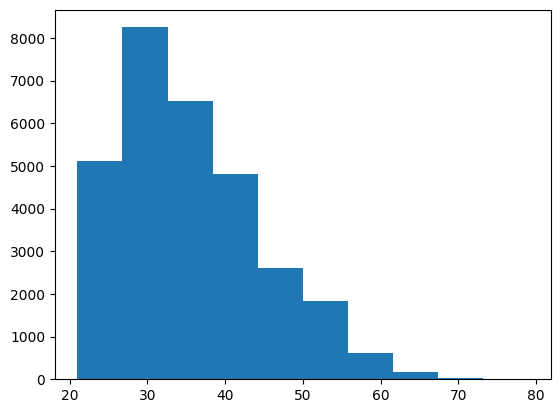

In [66]:
import matplotlib.pyplot as plt

plt.hist(df_no_empty_rows['Age'])

Podemos considerar los muestreos de personas arriba de 60 como outliers, entonces procedemos a eliminarlos de nuestro dataframe

C:\Users\genar\AppData\Local\Temp\ipykernel_6356\3715531316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_empty_rows.drop(df_no_empty_rows.index[df_no_empty_rows['Age'] >= 60], inplace=True)


(array([2680., 5322., 5366., 4527., 2937., 3151., 2384., 1666., 1083.,
         504.]),
 array([21. , 24.8, 28.6, 32.4, 36.2, 40. , 43.8, 47.6, 51.4, 55.2, 59. ]),
 <BarContainer object of 10 artists>)

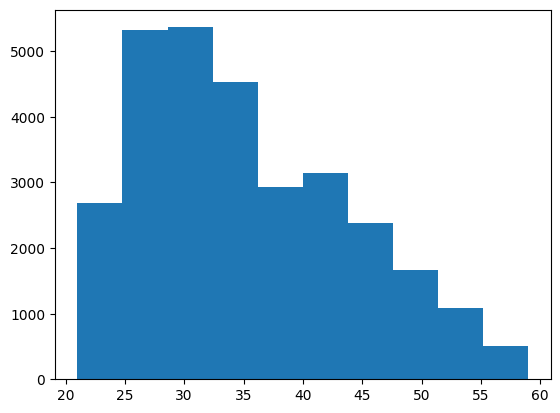

In [67]:
df_no_empty_rows.drop(df_no_empty_rows.index[df_no_empty_rows['Age'] >= 60], inplace=True)
#df_no_empty_rows
plt.hist(df_no_empty_rows['Age'])

Este sera nuestro dataframe limpio

In [68]:
df_clean = df_no_empty_rows
df_clean

,Amount of the given credit,Education,Age,"Repayment September, 2005","Repayment August, 2005","Repayment July, 2005","Repayment June, 2005","Repayment May, 2005","Repayment April, 2005","Bill September, 2005",...,"Bill June, 2005","Bill May, 2005","Bill April, 2005","amount paid September, 2005","amount paid August, 2005","amount paid July, 2005","amount paid June, 2005","amount paid May, 2005","amount paid April, 2005",Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,2.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,3.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,3.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
